In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

# Load the data

In [7]:
file_path = './pizza_sales.csv'
pizza_data = pd.read_csv(file_path,index_col='pizza_id')

In [8]:
pizza_data.head()

,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
pizza_id,,,,,,,,,,,
1.0,1.0,hawaiian_m,1.0,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
2.0,2.0,classic_dlx_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
3.0,2.0,five_cheese_l,1.0,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
4.0,2.0,ital_supr_l,1.0,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
5.0,2.0,mexicana_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


# examine the dataset

In [9]:
pizza_data.columns

Index(['order_id', 'pizza_name_id', 'quantity', 'order_date', 'order_time',
       'unit_price', 'total_price', 'pizza_size', 'pizza_category',
       'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [14]:
pizza_data.dtypes

order_id             float64
pizza_name_id         object
quantity             float64
order_date            object
order_time            object
unit_price           float64
total_price          float64
pizza_size            object
pizza_category        object
pizza_ingredients     object
pizza_name            object
dtype: object

In [16]:
pizza_data.isnull().sum()

order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [18]:
pizza_data['order_date'].tail(20) # day,month,year

pizza_id
48601.0    31-12-2015
48602.0    31-12-2015
48603.0    31-12-2015
48604.0    31-12-2015
48605.0    31-12-2015
48606.0    31-12-2015
48607.0    31-12-2015
48608.0    31-12-2015
48609.0    31-12-2015
48610.0    31-12-2015
48611.0    31-12-2015
48612.0    31-12-2015
48613.0    31-12-2015
48614.0    31-12-2015
48615.0    31-12-2015
48616.0    31-12-2015
48617.0    31-12-2015
48618.0    31-12-2015
48619.0    31-12-2015
48620.0    31-12-2015
Name: order_date, dtype: object

# data cleaning

In [23]:
pizza_data['order_date'].unique()

array(['1/1/2015', '2/1/2015', '3/1/2015', '4/1/2015', '5/1/2015',
       '6/1/2015', '7/1/2015', '8/1/2015', '9/1/2015', '10/1/2015',
       '11/1/2015', '12/1/2015', '13-01-2015', '14-01-2015', '15-01-2015',
       '16-01-2015', '17-01-2015', '18-01-2015', '19-01-2015',
       '20-01-2015', '21-01-2015', '22-01-2015', '23-01-2015',
       '24-01-2015', '25-01-2015', '26-01-2015', '27-01-2015',
       '28-01-2015', '29-01-2015', '30-01-2015', '31-01-2015', '1/2/2015',
       '2/2/2015', '3/2/2015', '4/2/2015', '5/2/2015', '6/2/2015',
       '7/2/2015', '8/2/2015', '9/2/2015', '10/2/2015', '11/2/2015',
       '12/2/2015', '13-02-2015', '14-02-2015', '15-02-2015',
       '16-02-2015', '17-02-2015', '18-02-2015', '19-02-2015',
       '20-02-2015', '21-02-2015', '22-02-2015', '23-02-2015',
       '24-02-2015', '25-02-2015', '26-02-2015', '27-02-2015',
       '28-02-2015', '1/3/2015', '2/3/2015', '3/3/2015', '4/3/2015',
       '5/3/2015', '6/3/2015', '7/3/2015', '8/3/2015', '9/3/2015',
   

In [28]:
pizza_data['order_date'] = pd.to_datetime( pizza_data['order_date'],dayfirst=True,errors='coerce')
pizza_data.dtypes

order_id                    float64
pizza_name_id                object
quantity                    float64
order_date           datetime64[ns]
order_time                   object
unit_price                  float64
total_price                 float64
pizza_size                   object
pizza_category               object
pizza_ingredients            object
pizza_name                   object
dtype: object

In [29]:
pizza_data.isnull().sum()

order_id                 0
pizza_name_id            0
quantity                 0
order_date           29033
order_time               0
unit_price               0
total_price              0
pizza_size               0
pizza_category           0
pizza_ingredients        0
pizza_name               0
dtype: int64

In [51]:
clean_pizza_data.dtypes

order_id                    float64
pizza_name_id                object
quantity                    float64
order_date           datetime64[ns]
order_time                   object
unit_price                  float64
total_price                 float64
pizza_size                   object
pizza_category               object
pizza_ingredients            object
pizza_name                   object
dtype: object

In [31]:
clean_pizza_data = pizza_data.dropna()
clean_pizza_data.isnull().sum()

order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

# Histogram chart

In [32]:
clean_pizza_data['pizza_name'].head()

pizza_id
1.0           The Hawaiian Pizza
2.0     The Classic Deluxe Pizza
3.0        The Five Cheese Pizza
4.0    The Italian Supreme Pizza
5.0           The Mexicana Pizza
Name: pizza_name, dtype: object

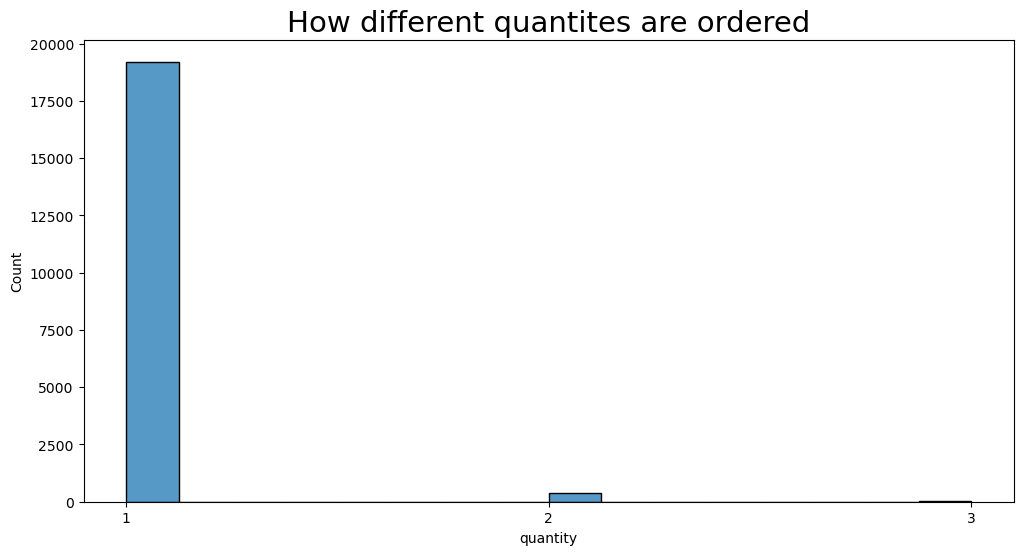

In [37]:
plt.figure(figsize=(12,6))
plt.title("How different quantites are ordered",fontdict={'fontsize':21})
plt.xticks(ticks=[1,2,3,4])
sns.histplot(data=clean_pizza_data,x='quantity')
plt.show()

It appears people tend to order 1 pizza than 2 most of time

# Bar chart

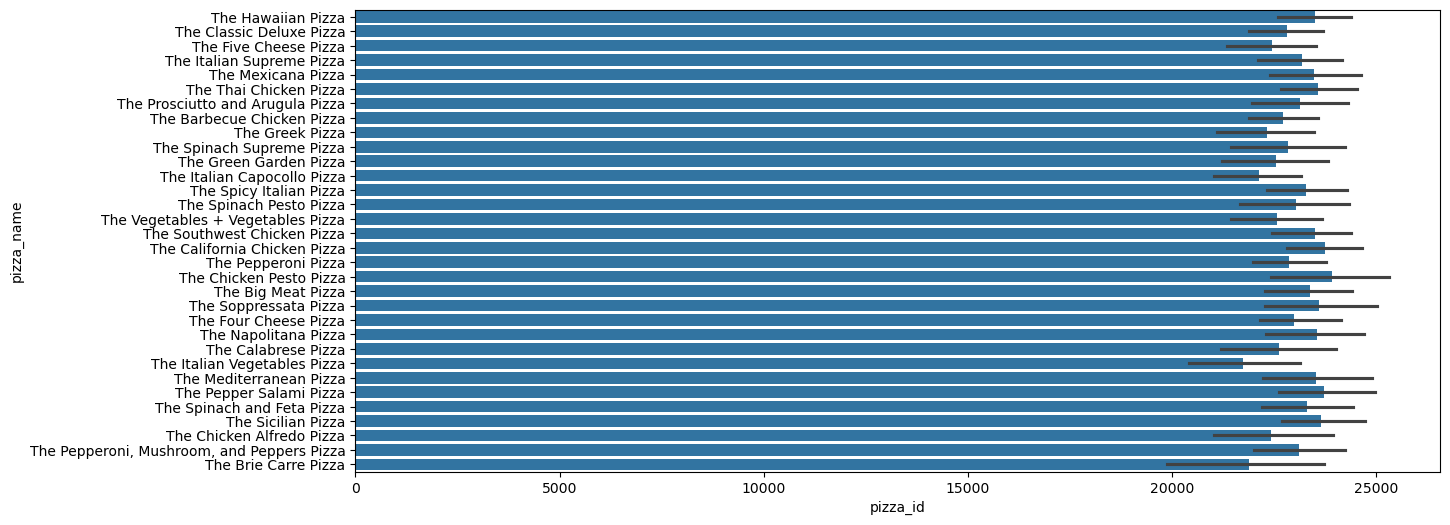

In [40]:
plt.figure(figsize=(14,6))

sns.barplot(clean_pizza_data['pizza_name'])
plt.show()

In [41]:
clean_pizza_data['pizza_category'].head()

pizza_id
1.0    Classic
2.0    Classic
3.0     Veggie
4.0    Supreme
5.0     Veggie
Name: pizza_category, dtype: object

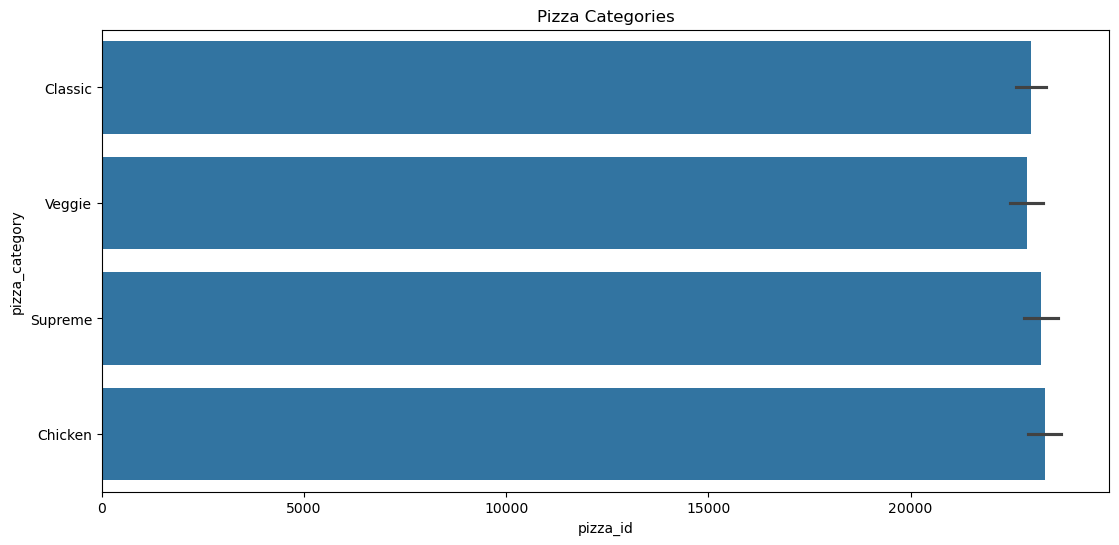

In [45]:
plt.figure(figsize=(13,6))
plt.title('Pizza Categories')
sns.barplot(clean_pizza_data['pizza_category'])
plt.show()

it appears chicken pizza is the most liked pizza

# line chart

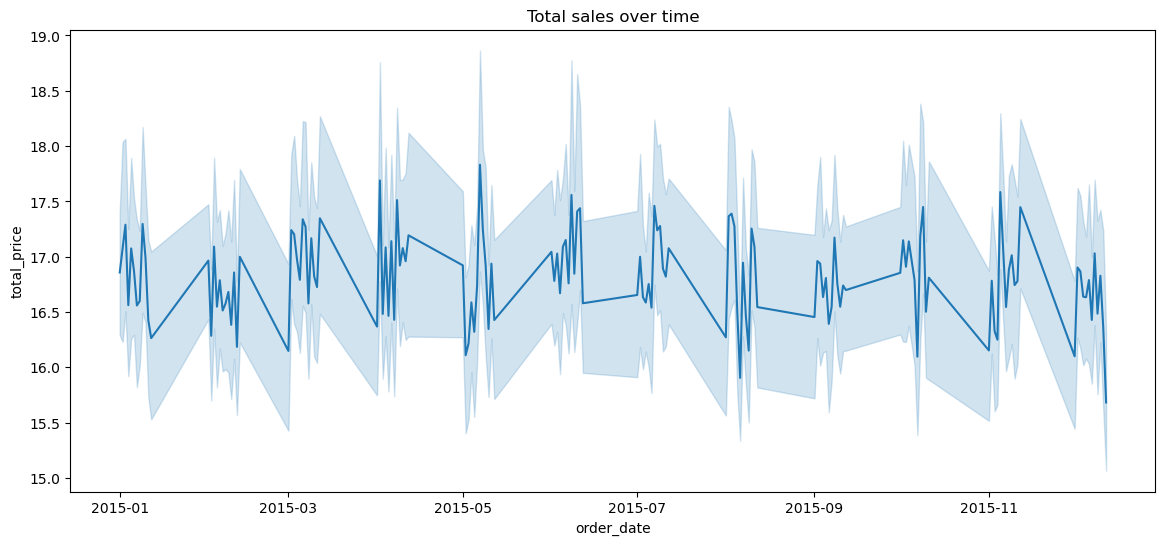

In [48]:
plt.figure(figsize=(14,6))
plt.title('Total sales over time')
sns.lineplot(data=clean_pizza_data,x='order_date',y='total_price')
plt.show()

In [54]:
# Step 1: Combine order_date and order_time into a full datetime
clean_pizza_data2 = clean_pizza_data.copy()
clean_pizza_data2.loc['order_datetime'] = pd.to_datetime(
    clean_pizza_data2['order_date'].astype(str) + ' ' + clean_pizza_data2['order_time']
)


In [56]:
# Extract day of week (Monday=0, Sunday=6)
clean_pizza_data['day_of_week'] = clean_pizza_data['order_datetime'].dt.dayofweek

# Extract hour of day
clean_pizza_data['hour'] = clean_pizza_data['order_datetime'].dt.hour

# Extract just the time part if needed
clean_pizza_data['just_time'] = clean_pizza_data['order_datetime'].dt.time


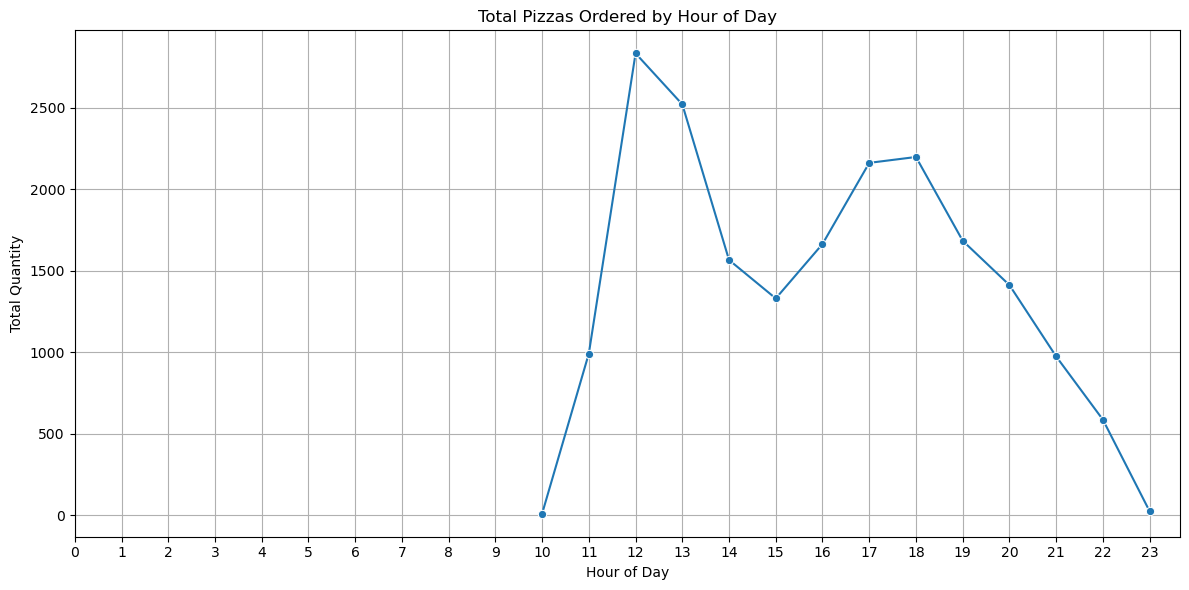

In [57]:
hourly_orders = clean_pizza_data.groupby('hour')['quantity'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=hourly_orders, x='hour', y='quantity', marker='o')
plt.title('Total Pizzas Ordered by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Quantity')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()
